In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

df = pd.read_csv("tesla_deliveries_dataset_2015_2025.csv")

df.head()


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations
0,2023,5,Europe,Model S,17646,17922,92874.27,120,704,1863.42,Interpolated (Month),12207
1,2015,2,Asia,Model X,3797,4164,62205.65,75,438,249.46,Official (Quarter),7640
2,2019,1,North America,Model X,8411,9189,117887.32,82,480,605.59,Interpolated (Month),14071
3,2021,2,North America,Model 3,6555,7311,89294.91,120,712,700.07,Official (Quarter),9333
4,2016,12,Middle East,Model Y,12374,13537,114846.78,120,661,1226.88,Estimated (Region),8722


In [ ]:
# Veri tipi bilgileri
df.info()

# Eksik değer sayıları
df.isnull().sum()


In [2]:
# Year ve Month kolonlarından bir tarih kolonu oluştur
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Tarihe göre sırala
df = df.sort_values('Date')

# İlk 5 satıra tekrar bakalım (tarih sıralı mı?)
df.head()


,Year,Month,Region,Model,Estimated_Deliveries,Production_Units,Avg_Price_USD,Battery_Capacity_kWh,Range_km,CO2_Saved_tons,Source_Type,Charging_Stations,Date
872,2015,1,Asia,Model Y,12446,13885,55183.13,60,340,634.75,Official (Quarter),4390,2015-01-01
2354,2015,1,Middle East,Model 3,11446,12752,89289.40,100,588,1009.54,Estimated (Region),8925,2015-01-01
2312,2015,1,Middle East,Cybertruck,8803,9344,102888.58,60,336,443.67,Interpolated (Month),3923,2015-01-01
2293,2015,1,North America,Cybertruck,6367,6802,104962.32,82,459,438.37,Estimated (Region),9170,2015-01-01
2215,2015,1,Asia,Model 3,8795,9165,87988.73,82,456,601.58,Official (Quarter),12626,2015-01-01


In [3]:
# Korelasyon matrisi
corr = df[['Estimated_Deliveries',
           'Production_Units',
           'Avg_Price_USD',
           'Range_km',
           'Charging_Stations']].corr()
corr


,Estimated_Deliveries,Production_Units,Avg_Price_USD,Range_km,Charging_Stations
Estimated_Deliveries,1.000000,0.994234,-0.027546,-0.006606,0.000753
Production_Units,0.994234,1.000000,-0.029263,-0.002885,0.000600
Avg_Price_USD,-0.027546,-0.029263,1.000000,-0.017854,-0.017790
Range_km,-0.006606,-0.002885,-0.017854,1.000000,-0.008291
Charging_Stations,0.000753,0.000600,-0.017790,-0.008291,1.000000


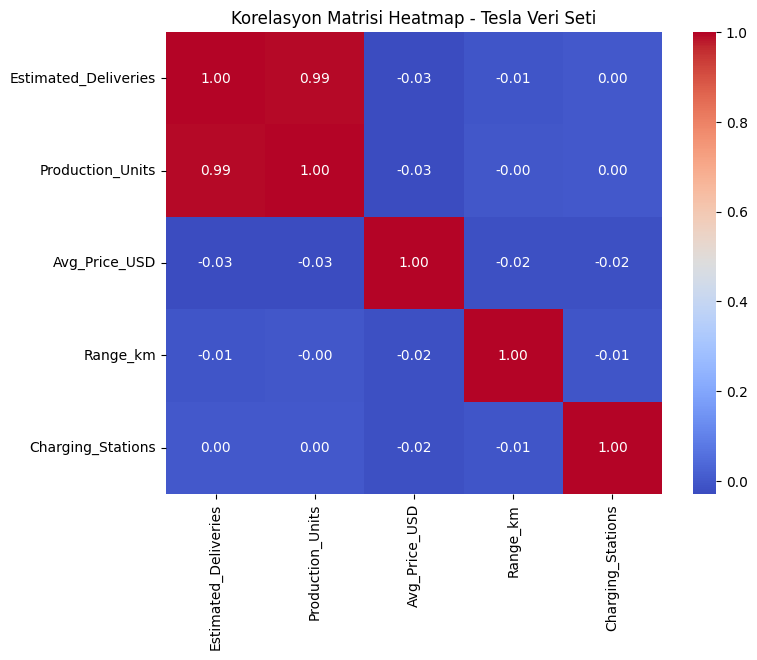

In [4]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasyon Matrisi Heatmap - Tesla Veri Seti")
plt.show()


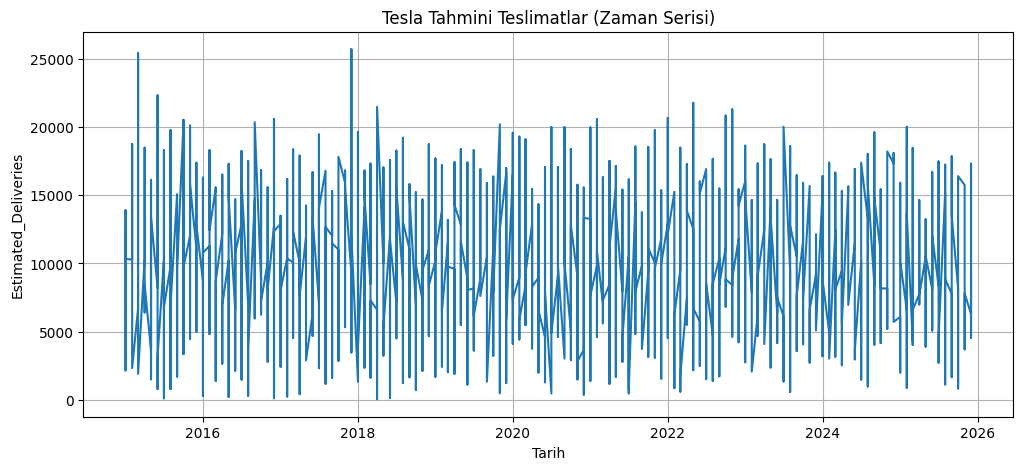

In [5]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Estimated_Deliveries'])
plt.xlabel('Tarih')
plt.ylabel('Estimated_Deliveries')
plt.title('Tesla Tahmini Teslimatlar (Zaman Serisi)')
plt.grid(True)
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Modelde kullanılacak özellikler (bağımsız değişkenler)
X = df[['Production_Units',
        'Avg_Price_USD',
        'Range_km',
        'Charging_Stations']]

# Tahmin etmeye çalıştığımız hedef (bağımlı değişken)
y = df['Estimated_Deliveries']

# Train / Test ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((2112, 4), (528, 4))

In [7]:
# Model oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Test verisiyle tahmin yap
y_pred = model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(171619.58791747846, 0.9885455240678824)

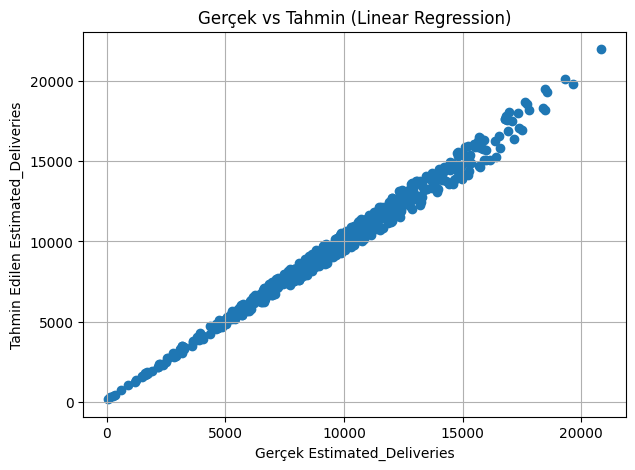

In [8]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Estimated_Deliveries')
plt.ylabel('Tahmin Edilen Estimated_Deliveries')
plt.title('Gerçek vs Tahmin (Linear Regression)')
plt.grid(True)
plt.show()
